In [1]:
import xarray as xr
import numpy as np
import time
t0 = time.time() # marks start
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import geopandas as gp

print(xr.__version__)
print(gp.__version__)

2022.10.0
0.12.1


In [2]:
nldas = xr.open_dataset('NLDAS_NOAH0125_M.A202201.020.nc')
nldas

<xarray.Dataset>
Dimensions:          (lon: 464, lat: 224, time: 1, bnds: 2)
Coordinates:
  * lon              (lon) float32 -124.9 -124.8 -124.7 ... -67.31 -67.19 -67.06
  * lat              (lat) float32 25.06 25.19 25.31 25.44 ... 52.69 52.81 52.94
  * time             (time) datetime64[ns] 2022-01-01
Dimensions without coordinates: bnds
Data variables: (12/54)
    time_bnds        (time, bnds) datetime64[ns] ...
    SWdown           (time, lat, lon) float32 ...
    LWdown           (time, lat, lon) float32 ...
    SWnet            (time, lat, lon) float32 ...
    LWnet            (time, lat, lon) float32 ...
    Qle              (time, lat, lon) float32 ...
    ...               ...
    RCSOL            (time, lat, lon) float32 ...
    RSmin            (time, lat, lon) float32 ...
    RSMacr           (time, lat, lon) float32 ...
    LAI              (time, lat, lon) float32 ...
    GVEG             (time, lat, lon) float32 ...
    Streamflow       (time, lat, lon) float32 ...
Attributes: (12/17)
    missing_value:          -9999.0
    time_definition:        monthly
    shortname:              NLDAS_NOAH0125_M_2.0
    title:                  NLDAS Noah Land Surface Model L4 Monthly 0.125 x ...
    version:                2.0
    institution:            NASA GSFC
    ...                     ...
    websites:               https://ldas.gsfc.nasa.gov/nldas/ ; https://lis.g...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  25.0625
    SOUTH_WEST_CORNER_LON:  -124.9375
    DX:                     0.125
    DY:                     0.125

In [11]:
a = xr.open_dataset('GLDAS_NOAH025_M.A202207.021.nc4')
# a

b = xr.open_dataset('GLDASp5_domveg_NOAH3.6_025d.nc4')
a

<xarray.Dataset>
Dimensions:                (lat: 600, lon: 1440, time: 1, bnds: 2)
Coordinates:
  * lat                    (lat) float32 -59.88 -59.62 -59.38 ... 89.62 89.88
  * lon                    (lon) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
  * time                   (time) datetime64[ns] 2022-07-01
Dimensions without coordinates: bnds
Data variables: (12/37)
    time_bnds              (time, bnds) datetime64[ns] ...
    Swnet_tavg             (time, lat, lon) float32 ...
    Lwnet_tavg             (time, lat, lon) float32 ...
    Qle_tavg               (time, lat, lon) float32 ...
    Qh_tavg                (time, lat, lon) float32 ...
    Qg_tavg                (time, lat, lon) float32 ...
    ...                     ...
    Rainf_f_tavg           (time, lat, lon) float32 ...
    Tair_f_inst            (time, lat, lon) float32 ...
    Qair_f_inst            (time, lat, lon) float32 ...
    Psurf_f_inst           (time, lat, lon) float32 ...
    SWdown_f_tavg          (time, lat, lon) float32 ...
    LWdown_f_tavg          (time, lat, lon) float32 ...
Attributes: (12/16)
    missing_value:          -9999.0
    tavg definition::       past 3-hour average
    acc definition::        past 3-hour accumulation
    inst definition::       instantaneous
    title:                  GLDAS2.1 LIS land surface model output monthly mean
    institution:            NASA GSFC
    ...                     ...
    comment:                website: https://ldas.gsfc.nasa.gov/gldas, https:...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  -59.875
    SOUTH_WEST_CORNER_LON:  -179.875
    DX:                     0.25
    DY:                     0.25

In [3]:
a

<xarray.Dataset>
Dimensions:                (lat: 600, lon: 1440, time: 1, bnds: 2)
Coordinates:
  * lat                    (lat) float32 -59.88 -59.62 -59.38 ... 89.62 89.88
  * lon                    (lon) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
  * time                   (time) datetime64[ns] 2022-07-01
Dimensions without coordinates: bnds
Data variables: (12/37)
    time_bnds              (time, bnds) datetime64[ns] ...
    Swnet_tavg             (time, lat, lon) float32 ...
    Lwnet_tavg             (time, lat, lon) float32 ...
    Qle_tavg               (time, lat, lon) float32 ...
    Qh_tavg                (time, lat, lon) float32 ...
    Qg_tavg                (time, lat, lon) float32 ...
    ...                     ...
    Rainf_f_tavg           (time, lat, lon) float32 ...
    Tair_f_inst            (time, lat, lon) float32 ...
    Qair_f_inst            (time, lat, lon) float32 ...
    Psurf_f_inst           (time, lat, lon) float32 ...
    SWdown_f_tavg          (time, lat, lon) float32 ...
    LWdown_f_tavg          (time, lat, lon) float32 ...
Attributes: (12/16)
    missing_value:          -9999.0
    tavg definition::       past 3-hour average
    acc definition::        past 3-hour accumulation
    inst definition::       instantaneous
    title:                  GLDAS2.1 LIS land surface model output monthly mean
    institution:            NASA GSFC
    ...                     ...
    comment:                website: https://ldas.gsfc.nasa.gov/gldas, https:...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  -59.875
    SOUTH_WEST_CORNER_LON:  -179.875
    DX:                     0.25
    DY:                     0.25

In [4]:
c = gp.read_file('shapes/columbia/Columbia_Basin_Watershed_Boundary.shp')
c.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Derived Projected CRS: PROJCS["NAD83 Alaska Albers Equal Area USGS",GEOGC ...>
Name: NAD83 Alaska Albers Equal Area USGS
Axis Info [cartesian]:
- [east]: Easting (Meter)
- [north]: Northing (Meter)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers_Conical_Equal_Area
Datum: NAD 83
- Ellipsoid: GRS 80
- Prime Meridian: Greenwich

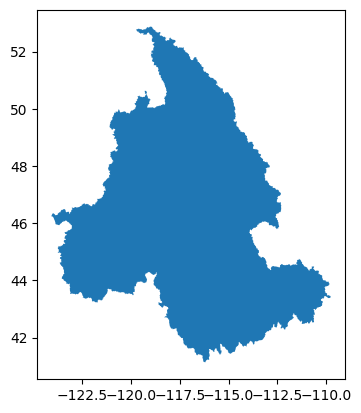

In [5]:
c.plot()
d = gp.read_file('shapes/yukon/linesegs_yukon/YRW_line.shp')
e = gp.read_file('shapes/yukon/3331.shp')

d.crs

In [6]:
e.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

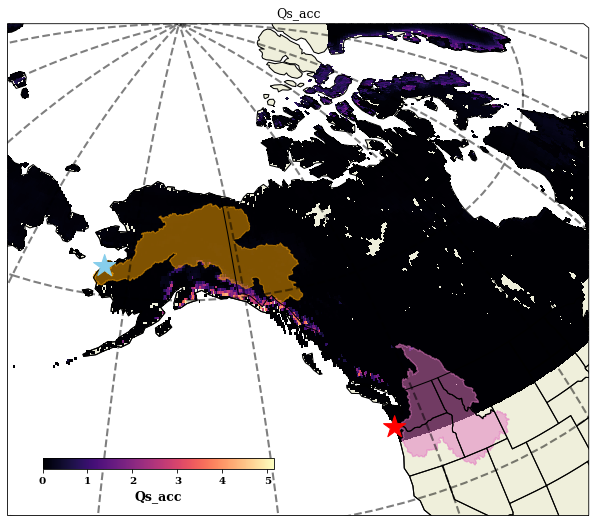

time elapsed:	579.168


In [19]:
veg = a.Qs_acc[0]

#changes typeface
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams["font.weight"] = "bold"
plt.rcParams['figure.dpi'] = 75


# points_ms = [-91.206944, 30.429167]
# points_ct = [-72.5531454, 41.5417656]

pts_waor = [-124.052614, 46.275876]
pts_yuk = [-164.636118, 62.684707]

points = [pts_waor,pts_yuk]

fig = plt.figure(figsize=(10,10)) #create a figure object, blank square on the screen
ax = fig.add_subplot(1, 1, 1, projection=cartopy.crs.Orthographic(-151,36)) #creates single plot for the blank square, states the coordinate system that all everything will be plotted with

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_extent([-170, -100, 40, 90])
# ax.set_extent([-150,-100, 40, 90], crs=ccrs.PlateCarree())
ax.coastlines() #adds coastlines
ax.add_feature(cfeature.STATES,zorder=2) #states
ax.add_feature(cfeature.LAND) #land
# ax.add_feature(cfeature.OCEAN) #ocean
ax.add_geometries(c.geometry,crs=ccrs.PlateCarree(),color='#e377c2',alpha=.5)
ax.add_geometries(d.geometry,crs=ccrs.epsg(3338),color='orange',alpha=.5) 
# ax.add_geometries(e.geometry,crs=ccrs.PlateCarree(),color='blue',alpha=.3)
# ax.add_geometries(ms.geometry,crs=ccrs.epsg(5070),color='#17becf')# "" mississippi""" "" """"" "" """"" "" """"" "" """"" "" """"" "" """"" "" 5070 """"" "" ""
ax.scatter([i[0] for i in points],[i[1] for i in points],marker='*',s=500,c=['red','skyblue'],transform=ccrs.PlateCarree(),zorder=50)
# colorado = mpatches.Patch(color='#d62728', label='Colorado') #creates legend item, specifies color
# bearriver = mpatches.Patch(color='#2ca02c', label='Bear')#creates legend item, specifies color
# connecticut = mpatches.Patch(color='#e377c2', label='Connecticut')#creates legend item, specifies color
# mississippi = mpatches.Patch(color='#17becf', label='Mississippi')#creates legend item, specifies color
# columbia = mpatches.Patch(color='black',label='Columbia')
# yukon = mpatches.Patch(color='plum',label='Yukon')

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.5, linestyle='--', draw_labels=False)

gl.xlocator = matplotlib.ticker.FixedLocator([-160, -140, -120, -100, -80, -60, -40, 0, 120, 140, 160, 180])
gl.ylocator = matplotlib.ticker.FixedLocator([0, 20, 40, 60])
veggy = veg[420:550].plot.pcolormesh(ax=ax,transform=ccrs.PlateCarree(),cmap='magma',
                                     add_colorbar=False)
                            # cbar_kwargs={
                            #     'orientation':'horizontal',
                            #     'shrink':0.6,
                            #     'aspect':40,
                            #     'label':'veg',
                            # })
                        
cb = plt.colorbar(veggy,orientation="horizontal",anchor=(0.1,0), pad=-0.1,fraction=.02)
cb.set_label(label='Qs_acc', size='large', weight='bold')
plt.title('Qs_acc')
# ax.legend(handles=[columbia,yukon],loc='lower left',fontsize=20) # creates legend
# ax.set_global()
plt.savefig('basins_mapped_notitle.png',bbox_inches='tight') ## saves figure
plt.show() ## plots figure

t1 = time.time() # marks completion
ccrs.epsg(26912)
print(f"time elapsed:\t{round(t1-t0,3)}")

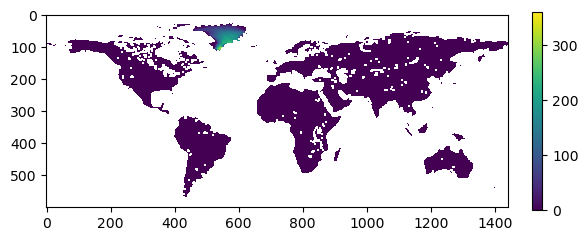

In [11]:
plt.imshow(np.flipud(a.SnowDepth_inst[0]))
plt.colorbar(fraction=0.02)